# Understanding Descriptive Statistics

Import the necessary libraries here:

In [27]:
# Libraries
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [28]:
# your code here
def roll_dice(n):
    result = []
    for i in range(n):
        result.append(np.random.randint(1,7))
    return result

In [36]:
lst = roll_dice(10)

In [37]:
lst.sort()
lst

[2, 3, 3, 4, 4, 5, 5, 5, 5, 6]

#### 2.- Plot the results sorted by value.

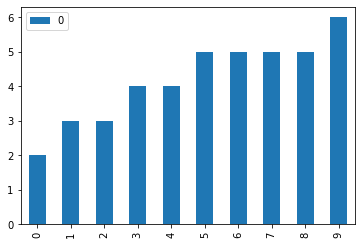

In [38]:
df = pd.DataFrame(lst)

df.plot(kind='bar')


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [39]:
df = df.reset_index()
df.columns = ["count", "result"]
df

,count,result
0,0,2
1,1,3
2,2,3
3,3,4
4,4,4
5,5,5
6,6,5
7,7,5
8,8,5
9,9,6


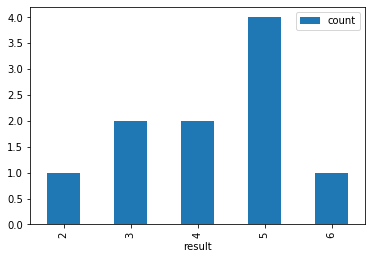

In [40]:
df2 = df.groupby("result").count()
df2.plot(kind='bar')

In [ ]:
"""
The first figure shows all the results of the rolling dice. Each bar represents a result. The second figure
is the aggregate result, each bar shows the count number of the rolling dice result.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [49]:
def average(x):
    return sum([i for i in x])/len(x)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [41]:
average(lst)

4.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [97]:
def median(x):
    x = sorted(x)
    i = round(len(x)/2)
    if len(x)%2:
        return (x[i-1] + x[i])/2 
    else:
        return x[i]

In [98]:
median(lst)

5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [102]:
def quartiles(x):
    x = sorted(x)
    i = round(len(x)/2)
    Q2 = median(x)
    Q1 = median(x[:i-1])
    Q3 = median(x[i+1:])
    return print(f'Q1 is {Q1}, Q2 is {Q2}, Q3 is {Q3}')


In [103]:
quartiles(lst)

Q1 is 3, Q2 is 5, Q3 is 5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [44]:
df = pd.read_csv("../data/roll_the_dice_hundred.csv")
del df["Unnamed: 0"]
df.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


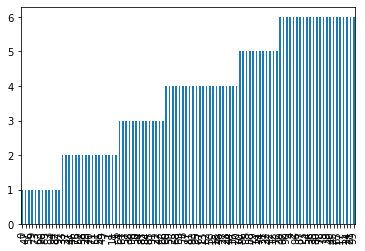

In [48]:
df.sort_values("value").value.plot(kind="bar")

In [ ]:
"""
The distribution of dice rolls number are not even.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [56]:
average(df["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [65]:
df_freq = df.groupby("value").count()
df_freq

,roll
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

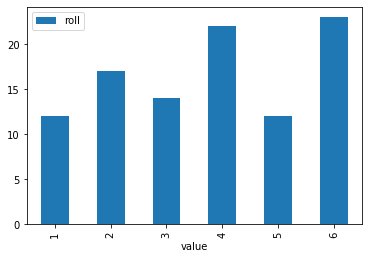

In [67]:
df_freq.plot(kind = "bar")

In [ ]:
"""
No, I can't really connect the mean value to the histogram. XD
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

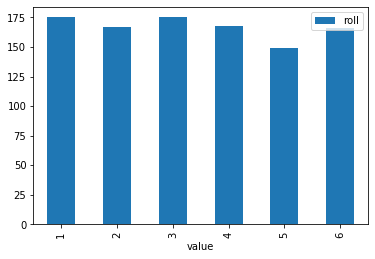

In [69]:
df2 = pd.read_csv("../data/roll_the_dice_thousand.csv")
del df2["Unnamed: 0"]
df2_freq = df2.groupby("value").count().plot(kind = "bar")

In [ ]:
"""
The distribution between values is more even (smothy)
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [96]:
df3 = pd.read_csv("../data/ages_population.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
observation    1000 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


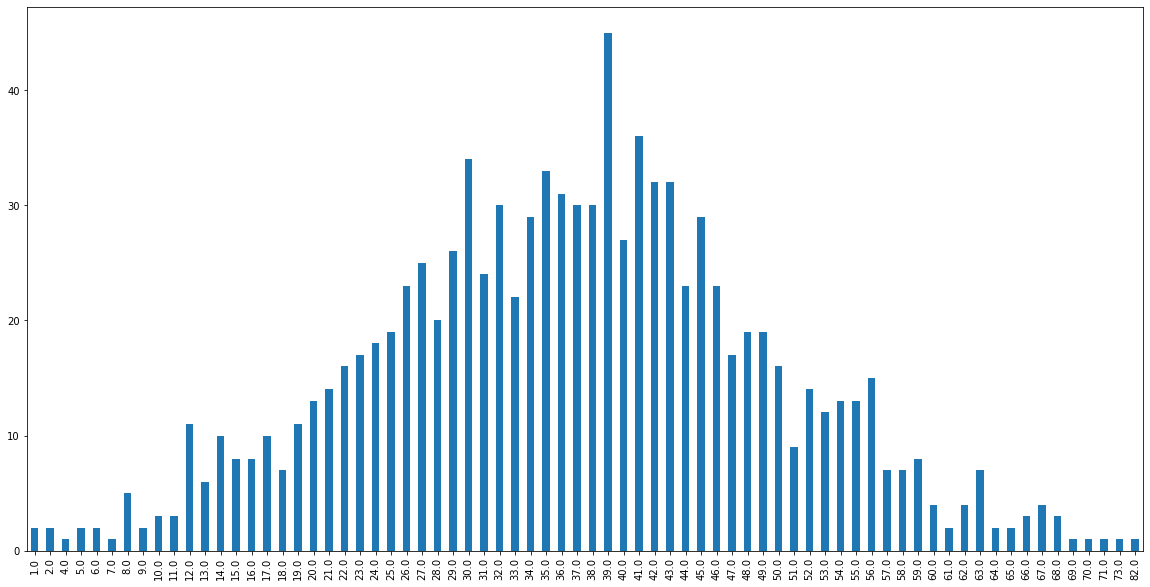

In [95]:
df3["observation"].value_counts().sort_index().plot(kind = "bar", figsize=(20,10))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [104]:
df3.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
Yes, the guessed mean and std are very closed to the exact mean and std.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [106]:
df4 = pd.read_csv("../data/ages_population2.csv")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
observation    1000 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


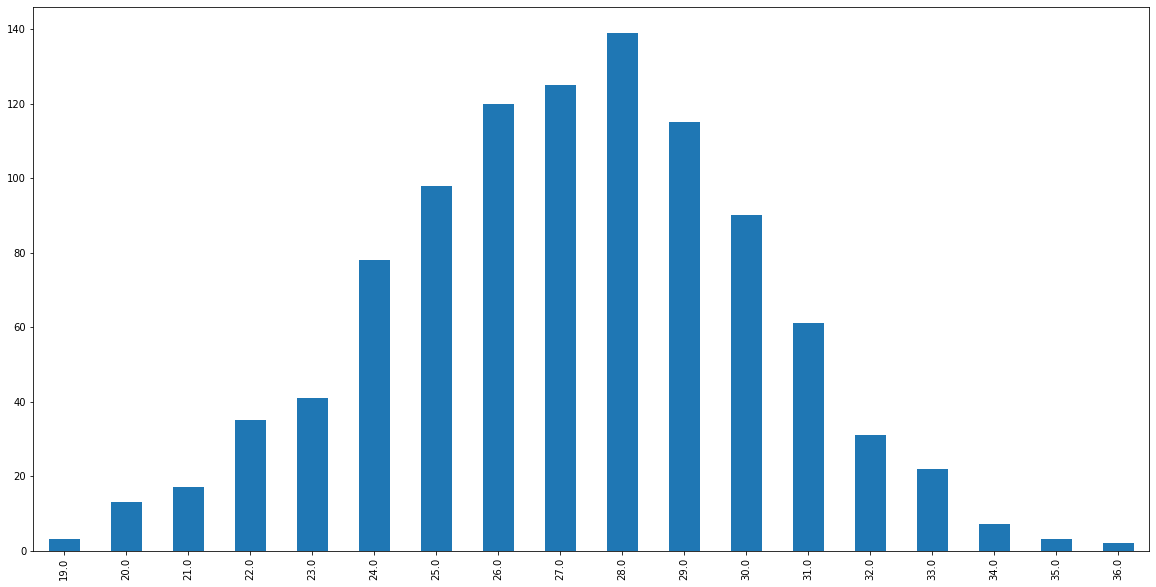

In [107]:
df4["observation"].value_counts().sort_index().plot(kind = "bar", figsize=(20,10))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The range (max - min) of data is different
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [108]:
df4.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
The std is much smaller than the previous dataset, in the other way, the data are more centralized.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [111]:
df5 = pd.read_csv("../data/ages_population3.csv")
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
observation    1000 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


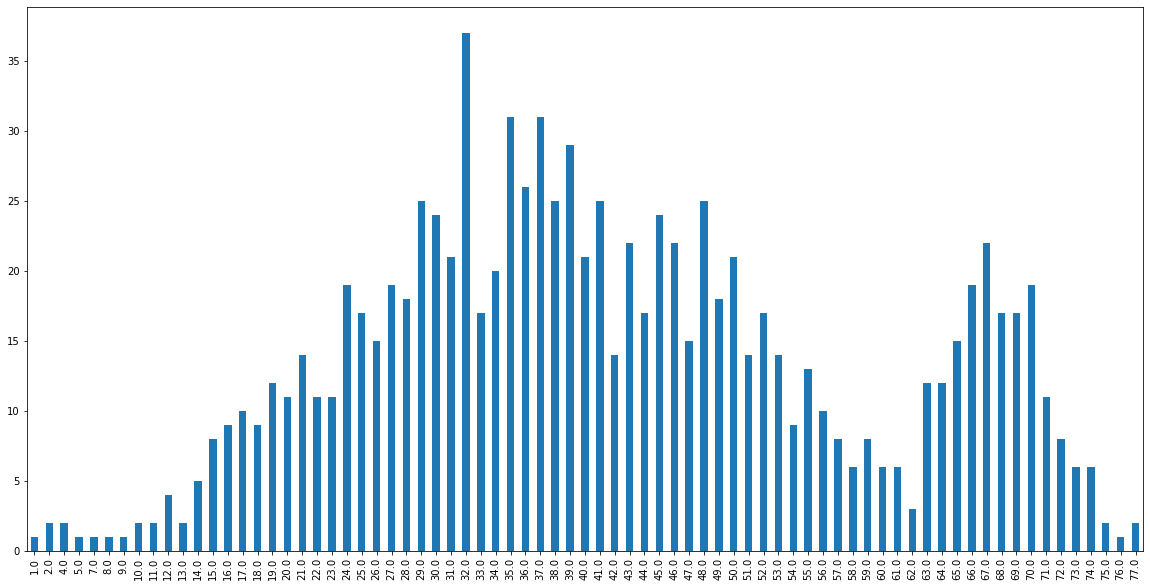

In [112]:
df5["observation"].value_counts().sort_index().plot(kind = "bar", figsize=(20,10))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [117]:
print(df5.mean())
print(df5.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
First, by using visualization, it is easy to spot the two peaks, especially the peak happened in the 63-72 ages iterval.
Second, the exact mean values doesn't lay on the first peak, rather is shifted to right. 
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [114]:
df5.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
The median is around 2 higher than the mean, showing that the mean is affected by the higher quartiles
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [119]:
df5.quantile([0.125, 0.25, 0.5, 0.75, 0.875])

,observation
0.125,24.0
0.250,30.0
0.500,40.0
0.750,53.0
0.875,66.0


In [ ]:
"""
The intervals between the percentiles are 6, 10, 13, 13, respectively, showing that there are a significant
amount of observations happened in the higher age interval.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""